In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../data/loan_approval_dataset.csv')

In [43]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_status_num
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0


In [13]:
data.columns = data.columns.str.strip()

In [14]:
data['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [15]:
missing_values = data.isnull().sum()
print(missing_values)

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [16]:
data.groupby('education')['loan_status'].value_counts(normalize=True)

education     loan_status
Graduate      Approved       0.624534
              Rejected       0.375466
Not Graduate  Approved       0.619765
              Rejected       0.380235
Name: proportion, dtype: float64

In [17]:
data.groupby('self_employed')['loan_status'].value_counts(normalize=True)

self_employed  loan_status
No             Approved       0.621992
               Rejected       0.378008
Yes            Approved       0.622326
               Rejected       0.377674
Name: proportion, dtype: float64

In [49]:
data.groupby('loan_term')['loan_status'].value_counts(normalize=True)

loan_term  loan_status
2          Approved       0.779703
           Rejected       0.220297
4          Approved       0.818792
           Rejected       0.181208
6          Approved       0.575510
           Rejected       0.424490
8          Approved       0.569948
           Rejected       0.430052
10         Approved       0.525229
           Rejected       0.474771
12         Approved       0.605263
           Rejected       0.394737
14         Approved       0.590123
           Rejected       0.409877
16         Approved       0.572816
           Rejected       0.427184
18         Approved       0.609005
           Rejected       0.390995
20         Approved       0.574209
           Rejected       0.425791
Name: proportion, dtype: float64

In [ ]:
data.groupby('no_of_dependents')['loan_status'].value_counts(normalize=True)

no_of_dependents  loan_status
0                 Approved       0.641854
                  Rejected       0.358146
1                 Approved       0.616930
                  Rejected       0.383070
2                 Approved       0.622881
                  Rejected       0.377119
3                 Approved       0.628611
                  Rejected       0.371389
4                 Approved       0.618351
                  Rejected       0.381649
5                 Approved       0.603269
                  Rejected       0.396731
Name: proportion, dtype: float64

In [38]:
data['loan_status'] = data['loan_status'].str.strip()

In [39]:
data['loan_status_num'] = data['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [34]:
data['income_annum'].head()

0    9600000
1    4100000
2    9100000
3    8200000
4    9800000
Name: income_annum, dtype: int64

In [41]:
print(data[['loan_status_num', 'income_annum']].isnull().sum())

loan_status_num    0
income_annum       0
dtype: int64


In [ ]:
correlation_income = data['loan_status_num'].corr(data['income_annum'])
print(f"Correlation between loan status and annual income: {correlation_income}")

Correlation between loan status and annual income: -0.015189156991943602


In [42]:
correlation_loan_amount = data['loan_status_num'].corr(data['loan_amount'])
print(f"Correlation between loan status and loan_amount: {correlation_loan_amount}")

Correlation between loan status and loan_amount: 0.01614968392531592


In [45]:
correlation_loan_amount = data['loan_status_num'].corr(data['loan_amount'])
print(f"Correlation between loan status and loan_amount: {correlation_loan_amount}")

Correlation between loan status and loan_amount: 0.01614968392531592


In [48]:
correlation_loan_amount = data['loan_status_num'].corr(data['loan_amount'])
print(f"Correlation between loan status and loan_amount: {correlation_loan_amount}")

correlation_loan_amount = data['loan_status_num'].corr(data['loan_amount'])
print(f"Correlation between loan status and loan_amount: {correlation_loan_amount}")

correlation_residential = data['loan_status_num'].corr(data['residential_assets_value'])
print(f"Correlation between loan status and residential assets value: {correlation_residential}")

correlation_commercial = data['loan_status_num'].corr(data['commercial_assets_value'])
print(f"Correlation between loan status and commercial assets value: {correlation_commercial}")

correlation_luxury = data['loan_status_num'].corr(data['luxury_assets_value'])
print(f"Correlation between loan status and luxury assets value: {correlation_luxury}")

correlation_bank = data['loan_status_num'].corr(data['bank_asset_value'])
print(f"Correlation between loan status and bank asset value: {correlation_bank}")

correlation_cibil = data['loan_status_num'].corr(data['cibil_score'])
print(f"Correlation between loan status and CIBIL score: {correlation_cibil}")

Correlation between loan status and loan_amount: 0.01614968392531592
Correlation between loan status and loan_amount: 0.01614968392531592
Correlation between loan status and residential assets value: -0.01436651453599929
Correlation between loan status and commercial assets value: 0.008245868278426226
Correlation between loan status and luxury assets value: -0.015464711194809464
Correlation between loan status and bank asset value: -0.0067784398003721165
Correlation between loan status and CIBIL score: 0.7705183649807016


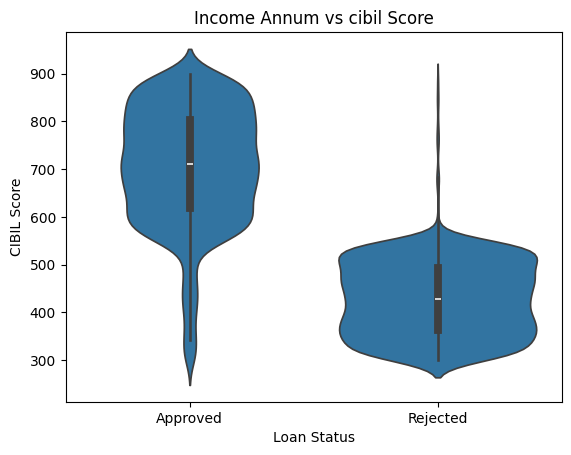

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='loan_status', y='cibil_score', data=data)
plt.title('Income Annum vs cibil Score')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()

In [76]:
loan_term_proportion_df = data.groupby(['loan_term', 'loan_status']).size() / data.groupby(['loan_term']).size()
loan_term_proportion_df = loan_term_proportion_df.reset_index(name='Percentage of approved')
loan_term_proportion_df = loan_term_proportion_df[loan_term_proportion_df['loan_status'] != 'Rejected']
loan_term_proportion_df = loan_term_proportion_df.drop(columns=['loan_status'])
loan_term_proportion_df['Percentage of approved'] = loan_term_proportion_df['Percentage of approved'] * 100
loan_term_proportion_df['Percentage of approved'] = loan_term_proportion_df['Percentage of approved'].round(2).astype(str) + '%'
loan_term_proportion_df = loan_term_proportion_df.sort_values(by='Percentage of approved', ascending=False)

print(loan_term_proportion_df)

    loan_term Percentage of approved
2           4                 81.88%
0           2                 77.97%
16         18                  60.9%
10         12                 60.53%
12         14                 59.01%
4           6                 57.55%
18         20                 57.42%
14         16                 57.28%
6           8                 56.99%
8          10                 52.52%


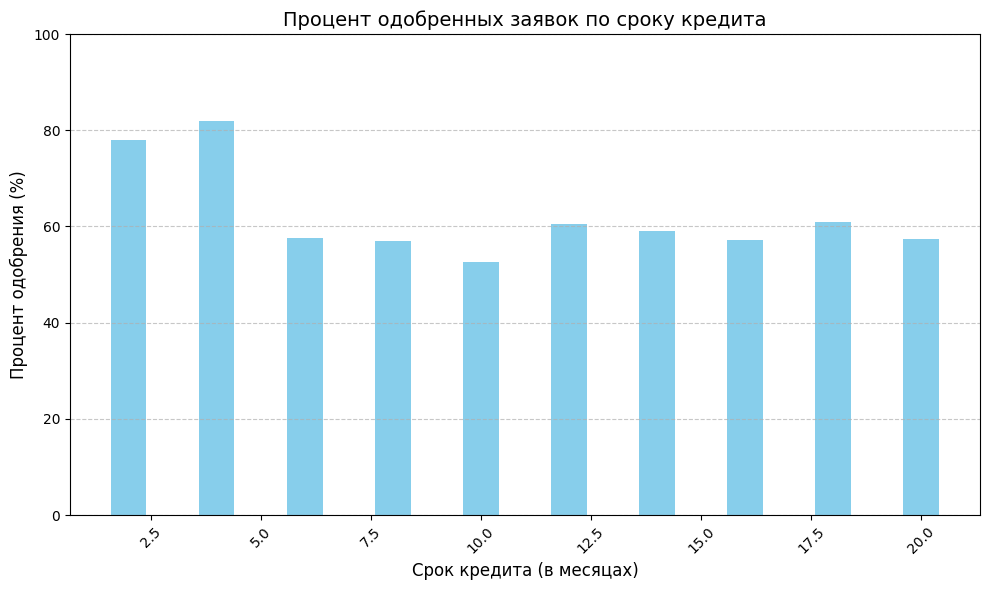

In [ ]:
import matplotlib.pyplot as plt

loan_term_proportion_df['Percentage of approved'] = loan_term_proportion_df['Percentage of approved'].astype(float)

plt.figure(figsize=(10, 6))
plt.bar(loan_term_proportion_df['loan_term'], loan_term_proportion_df['Percentage of approved'], color='skyblue')

plt.title('Lon term VS Percentage of approval', fontsize=14)
plt.xlabel('Loan term in months', fontsize=12)
plt.ylabel('Percentage of approval (%)', fontsize=12)
plt.ylim(0, 100) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

plt.show()